In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv
from sklearn.preprocessing import LabelEncoder
from scipy.stats import multivariate_normal
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import cv2
import math
import pickle
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
label_encoder = LabelEncoder()

In [2]:
with open('./SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as file:
    data = pickle.load(file)

In [3]:
n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)
means = gmm.means_
covariances = gmm.covariances_

In [4]:
print(means, covariances)

[[ 1.27172922e+02  1.26605367e+02]
 [ 2.54828851e+02 -2.08589583e-01]
 [ 2.67439699e-01  2.54518161e+02]
 [ 2.55165668e+02  1.27358500e+02]
 [ 1.27065742e+02 -8.44575440e-02]
 [ 9.95904977e-02  1.26934805e+02]
 [ 1.26931688e+02  2.54851953e+02]] [[[ 1.19754533 -0.01923169]
  [-0.01923169  1.70463777]]

 [[ 0.38531507 -0.21305776]
  [-0.21305776  0.64412607]]

 [[ 1.63856537  0.49894624]
  [ 0.49894624  0.65573231]]

 [[ 1.02962802 -0.03525602]
  [-0.03525602  0.57207645]]

 [[ 0.72802356  0.03254854]
  [ 0.03254854  1.04653338]]

 [[ 1.6740466   0.30152784]
  [ 0.30152784  0.89468541]]

 [[ 1.09300903  0.05372962]
  [ 0.05372962  0.93233538]]]


In [5]:
def generate_sample_data(n, means, covariances, num_samples):
    sample_data = []
    for _ in range(num_samples):
        component_idx = np.random.randint(n)
        point = np.random.multivariate_normal(means[component_idx], covariances[component_idx])
        sample_data.append(point)
    return np.array(sample_data)

In [5]:
sample_data = generate_sample_data(n_components, means, covariances, num_samples=1000)

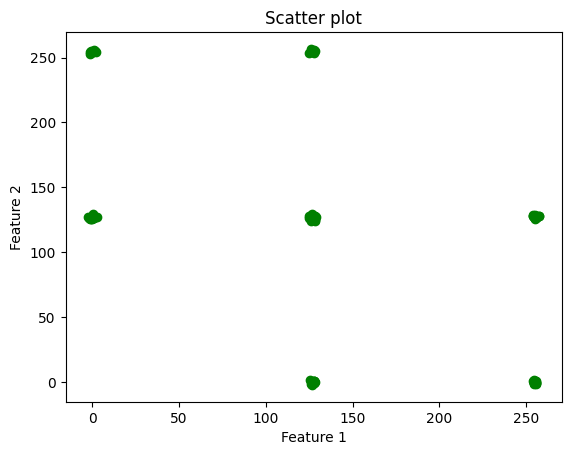

In [6]:
plt.scatter(data[:, 0], data[:, 1], c='green')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot")
plt.show()

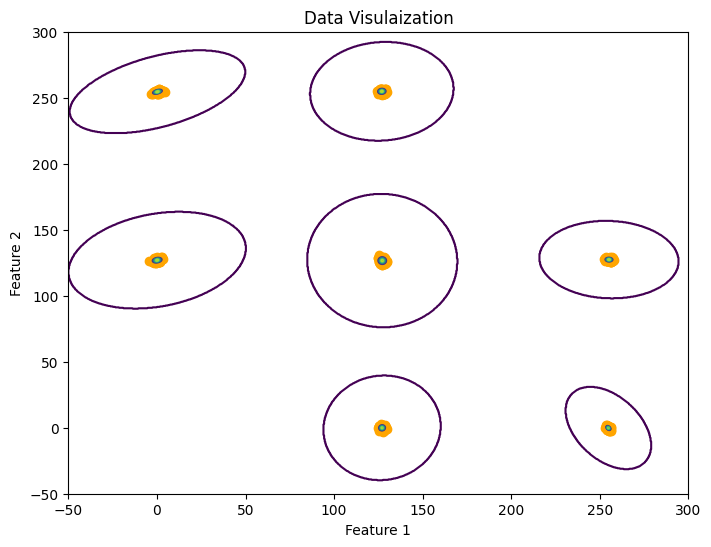

In [7]:
x = np.linspace(-50, 300, 1000)
y = np.linspace(-50, 300, 1000)
x, y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(0, len(means)):
    x_mean, y_mean = means[i]
    det_covariance = np.linalg.det(covariances[i])
    inv_covariance = np.linalg.inv(covariances[i])
    gaussian = (1 / (2 * np.pi * np.sqrt(det_covariance))) * np.exp(-0.5 * (inv_covariance[0, 0] * (x - x_mean)**2 +(inv_covariance[1, 0] + inv_covariance[0, 1]) * (x - x_mean) * (y - y_mean) +inv_covariance[1, 1] * (y - y_mean)**2))
    ax.contour(x, y, gaussian, cmap='viridis')
plt.scatter(sample_data[:, 0], sample_data[:, 1], c='orange')
ax.set_title('Data Visulaization')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()